In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras

2023-12-11 22:08:31.257423: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [71]:
df = pd.read_csv('insurance_data.csv')
df.head(10)


,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1
5,56,1,1
6,55,0,0
7,60,0,1
8,62,1,1
9,61,1,1


In [3]:
df.shape

(28, 3)

In [4]:
df.describe()

,age,affordibility,bought_insurance
count,28.000000,28.000000,28.000000
mean,39.892857,0.678571,0.500000
std,15.497525,0.475595,0.509175
min,18.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000
50%,45.500000,1.000000,0.500000
75%,54.250000,1.000000,1.000000
max,62.000000,1.000000,1.000000


In [5]:
input_features = ['age', 'affordibility']

X_train, X_test, y_train, y_test = train_test_split(df[input_features],df['bought_insurance'], random_state=42, test_size=0.2 )


In [6]:
print(X_train.shape)
print(X_test.shape)

(22, 2)
(6, 2)


## Age VS Insurance Graph

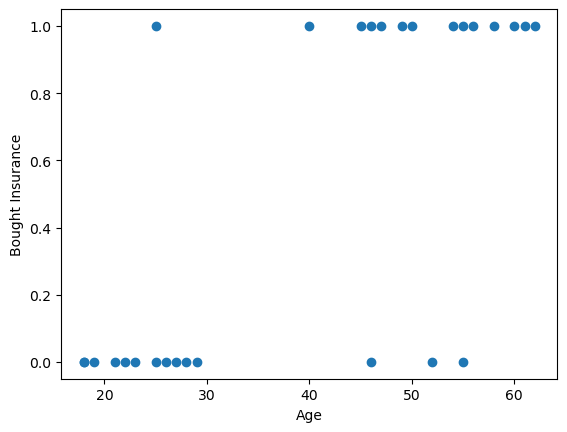

In [7]:
plt.scatter(df['age'], df.bought_insurance)
plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.show()

### Scaling

In [13]:
X_train_scale = X_train.copy()
X_train_scale['age'] = X_train_scale['age'] / 100
X_test_scale = X_test.copy()
X_test_scale['age'] = X_test_scale['age'] / 100

In [14]:
model = keras.Sequential([
    keras.layers.Dense(
        1, input_shape = (2,),activation='sigmoid', bias_initializer='zeros', kernel_initializer='ones'
    )
]
)

model.compile(
    loss= 'binary_crossentropy', 
    optimizer= 'adam', 
    metrics= ['accuracy']
)

In [17]:
model.fit(
    X_train_scale, y_train, epochs=3000
)

Epoch 1/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.7055 - accuracy: 0.5000
Epoch 2/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.7052 - accuracy: 0.5000
Epoch 3/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.7049 - accuracy: 0.5000
Epoch 4/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.7045 - accuracy: 0.5000
Epoch 5/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.7042 - accuracy: 0.5000
Epoch 6/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.7039 - accuracy: 0.5000
Epoch 7/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.7036 - accuracy: 0.5000
Epoch 8/3000
1/1 [==============================] - 0s 10ms/step - loss: 0.7033 - accuracy: 0.5000
Epoch 9/3000
1/1 [==============================] - 0s 10ms/step - loss: 0.7030 - accuracy: 0.5000
Epoch 10/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.7027 - accuracy: 0.5000
Epoch 11/3000


In [18]:
model.evaluate(X_test_scale, y_test)

1/1 [==============================] - 0s 49ms/step - loss: 0.3676 - accuracy: 1.0000


[0.3675731420516968, 1.0]

In [29]:
y_pred = model.predict(X_test_scale)
y_pred = (y_pred >= .5).astype(int)
y_pred


1/1 [==============================] - 0s 27ms/step


array([[1],
       [1],
       [1],
       [0],
       [0],
       [0]])

In [30]:
y_test

9     1
25    1
8     1
21    0
0     0
12    0
Name: bought_insurance, dtype: int64

In [32]:
coef, bias = model.get_weights()
coef, bias

(array([[3.2052193 ],
        [0.90796113]], dtype=float32),
 array([-1.7843314], dtype=float32))

By using Neural Network, 
w1 = 3.2052, 
w2 = 0.90796, 
b = -1.7843, 

## Defining own gradient descent

In [60]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

def log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred_new = [max(i, epsilon) for i in y_pred]
    y_pred_new = [min(i, 1-epsilon) for i in y_pred]
    y_pred_new = np.array(y_pred_new)

    return -np.mean(y_true*np.log(y_pred_new)+(1-y_true)*np.log(1-y_pred_new))

In [65]:
def gradient_descent(age, affordability, y_true, epochs, lr, threshold):
    w1 = w2 = 1 
    bias = 0 
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age+ w2 * affordability + bias
        y_pred = sigmoid(weighted_sum)
        loss = log_loss(y_true, y_pred)
      
        w1d = (1/n) * np.dot(np.transpose(age), (y_pred - y_true))
        w2d = (1/n) * np.dot(np.transpose(affordability), (y_pred - y_true))
        biasd = np.mean(y_pred-y_true)

        w1 = w1 - w1d
        w2 = w2 - w2d
        bias = bias - biasd

        print(f'Epochs: {i}, loss: {loss}, w1: {w1}, w2: {w2}, bias: {bias}')

        if loss <= threshold: 
            print(f'Epochs: {i}, loss: {loss}, w1: {w1}, w2: {w2}, bias: {bias}')
            break

    return w1, w2, bias 


In [67]:
w1, w2, bias = gradient_descent(X_train_scale['age'],X_train_scale['affordibility'] , y_train, 2000, 0.5, 0.5402)

Epochs: 0, loss: 0.7428288579142563, w1: 0.9473798637694563, w2: 0.8627776219553182, bias: -0.23497903333540895
Epochs: 1, loss: 0.6775296386608192, w1: 0.9209468847801393, w2: 0.773047749317965, bias: -0.4026555540549724
Epochs: 2, loss: 0.6468864038401843, w1: 0.9148095159835463, w2: 0.7211559725845829, bias: -0.5184512800749073
Epochs: 3, loss: 0.6334915697435844, w1: 0.9225069153205981, w2: 0.6952830555243716, bias: -0.5989131269862452
Epochs: 4, loss: 0.6273689485736003, w1: 0.9389746317172578, w2: 0.6858319561760625, bias: -0.6568858387567422
Epochs: 5, loss: 0.6240519721787187, w1: 0.9608011777822973, w2: 0.686248090914084, bias: -0.7009775761991539
Epochs: 6, loss: 0.6217820716906745, w1: 0.9858424635452655, w2: 0.6923920033050924, bias: -0.7365835111149522
Epochs: 7, loss: 0.6199083989553944, w1: 1.0127931613267844, w2: 0.7017445804628424, bias: -0.7669836359688389
Epochs: 8, loss: 0.618196513853526, w1: 1.0408701196887036, w2: 0.7128019122121345, bias: -0.794144881422216
Epoc

In [68]:
print(f'w1: {w1}, w2: {w2}, bias: {bias}')

w1: 3.1134061182293546, w2: 1.1112685392008528, bias: -1.946639608397725


In [70]:
coef, bias = model.get_weights()
coef, bias

(array([[3.2052193 ],
        [0.90796113]], dtype=float32),
 array([-1.7843314], dtype=float32))